# Best Practices

# Bias Variance TradeOff

## Overfitting

Overfitting is an undesirable machine learning behavior that occurs when the machine learning model gives accurate predictions for training data but not for new data. When data scientists use machine learning models for making predictions, they first train the model on a known data set. Then, based on this information, the model tries to predict outcomes for new data sets. An overfit model can give inaccurate predictions and cannot perform well for all types of new data

<img src="https://miro.medium.com/v2/1*Al3-WRfr4fTM3_pinPAsMQ.png" alt="Overfitting" style="height:400 px;width: 500px;"/>

## Underfitting

Underfitting is another type of error that occurs when the model cannot determine a meaningful relationship between the input and output data. You get underfit models if they have not been trained for the appropriate length of time on a large number of data points.

<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*sLI6QiUq22VMWI8cnUPZHQ.png" alt="Underfitting" style="width: 500px;"/>

## Overfitting vs Underfitting

Underfit models experience high bias—they give inaccurate results for both the training data and test set. On the other hand, overfit models experience high variance—they give accurate results for the training set but not for the test set. More model training results in less bias but variance can increase. This is called Bias/variance Traddeoff. Data scientists aim to find the sweet spot between underfitting and overfitting when fitting a model. Let us understand more with an example.

<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*WaZtPef1z_wxew9ONx1B2A.png" alt="TradeOff" style="width: 500px;"/>

An important theoretical result of statistics and Machine Learning is the fact that a model's generalization error can be expressed as the sum of three very different errors :

* __Bias__ : This part of generlization error is due to wrong assumptions such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.
* __Variance__ : This part is due to the model's excessive sensitivity to small variations in the training data. A model with many degrees of freedom (succh as a high-degree polynomial model) is likely to have high varianceand thus overfit the training data.
* __Irreducible Error__ : This part is due to the noisiness of the data itself The only way to reduce this error is to clean up the data (e.g., fix the data sources such as broken sensors or detect and remove outliers)

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*BA0RHYcvs8ml_JIDkIzUzQ.jpeg" alt="TradeOff" style="width: 800px;"/>

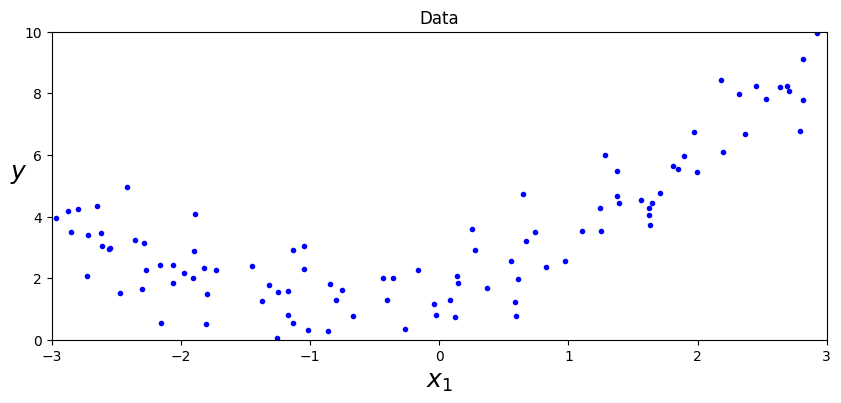

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd

np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.figure(figsize = (10, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.title("Data")
plt.show()

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s PolynomialFeatures class to transform our training data, adding the square (second degree polynomial) of each feature in the training set as a new feature (in this case there is just one feature). You can then fit a LinearRegression model to this extended training data):

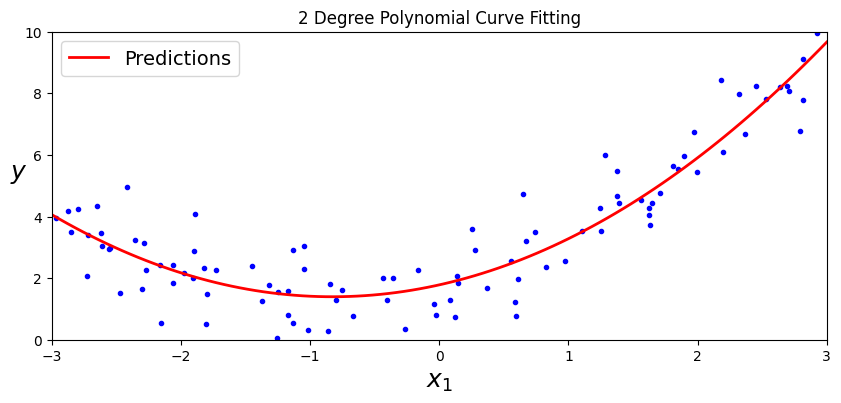

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

#Plot the polynomial regression for a degree 2 polynomial curve fitting

plt.figure(figsize = (10, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.title("2 Degree Polynomial Curve Fitting")
plt.show()

If you perform high-degree Polynomial Regression, you will likely fit the training data much better than with plain Linear Regression. For example, below code applies a 300-degree polynomial model to the preceding training data, and compares the result with a pure linear model. Notice how the 300-degree polynomial model wiggles around to get as close as possible to the training instances.

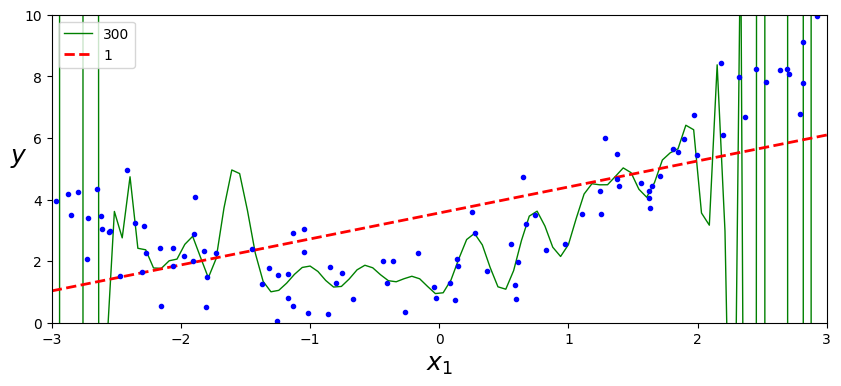

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

plt.figure(figsize = (10, 4))
for style, width, degree in (("g-", 1, 300), ("r--", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc = 'upper left')
plt.axis([-3, 3, 0, 10])

plt.show()

This high-degree Polynomial Regression model is severely overfitting the training data, while the linear model is underfitting it.
The model that will generalize the best in this case is the quadratic model, which makes sense because the data was generated using a quadratic model. But in general you won't know what function generated the data.

# Feature Selection

__Feature Selection__ is the method of reducing the input variable to your model by using only relevant data and getting rid of noise in data.

It is the process of automatically choosing relevant features for your machine learning model based on the type of problem you are trying to solve. We do this by including or excluding important features without changing them. It helps in cutting down the noise in our data and reducing the size of our input data.

![](https://www.simplilearn.com/ice9/free_resources_article_thumb/feature-selection.JPG)

## Feature Selection Models

Feature selection models are are of two types:

* __Supervised Models__ : Supervosed feature selection refers to the method which uses the output label class for feature selection. They use the target variables to identify the variables which can inccrease the the efficiency of the model.

* __Unsupervised Models__ : Unsupervised feature selction refers to the method which dooes not need the output label class for feature selection. We use them for unlabelled data.

### Filter Method :

In this method, features are droopped based on their relation to the output, or how they are __correlating__ to the output. We use the correlation to check if the features are positively or negatively correlated to the output labels and drop features accordingly. Eg: Information Gain, Chi-Square Test, Fisher's score, etc.

![](https://media.geeksforgeeks.org/wp-content/uploads/20201204094030/15.PNG)

### Wrapper Method :
We split our data into subsets and train a model using this. Based on the output of the model, we add and subtract features and train the model again. It forms the subsets using a greedy approach and evaluates teh accuracy of all the possible combinations of features. Eg: Recursive Feature Elimination ,Forward Selection, Backward Selection, etc.

![](https://media.geeksforgeeks.org/wp-content/uploads/20201204094004/12.PNG)

### Embedded Method
This method combines the qualitites of both Filter and Wrapper method to create the best subset. This method takes care of the machine learning iterative process while maintaining the computation cost to be minimum. Eg: Lasso and Ridge Regression, tree-based methods, etc.

![](https://media.geeksforgeeks.org/wp-content/uploads/20201204094003/11.PNG)

## Curse of Dimensioanlity

The curse of dimensionality refers to the difficulties that arise when analysing or modelling data with many dimensions. these problems can be summarized in the following points :

* Data Sparsity
* Computational Complexity
* Overfitting
* Distortion of Distance Metrics
* Visulaisation Challenges
* Data Preprocessing
* Algorithmic Efficiency
* Domain-Specific Challenges
* Interpretability Issues
* Data Storage Requuirements

## Dimensionality Reduction

Dimensionality Reduction is a technique used to reduce the number of features in a dataset while retaining as much of the important information as possible. In other words, it is a process of transforming high-dimensiona data into a lower-dimensional space that still preserves the essesnce of the original data.

Dimensionaity reduction can help to mitigate the priblems arising due to the curse of dimensionality by reduciing the complexity of the model and imrpoving its generalization performance.

### Principal Component Analysis

It is a statistical procedure that uses an orthogonal transformation that converts a set of correlated variables to a set of uncorrelated variables. PCA is the most widely used tool in exploratory data analysis and in machine learning for predictive models. It is an unsupervised learning algorithm technique.

PCA is used to reduce the dimensionality of a data set by finding a new set of variables, smaller than the original set of variables, retaining most of the sample's information, and useful for the regression and classification of data.

![](https://media.geeksforgeeks.org/wp-content/uploads/20230420165431/Principal-Componenent-Analysisi.webp)

In [1]:
import pandas as pd
import numpy as np

# Here we are using inbuilt dataset of scikit learn
from sklearn.datasets import load_breast_cancer

# instantiating
cancer = load_breast_cancer(as_frame=True)
# creating dataframe
df = cancer.frame

# checking shape
print('Original Dataframe shape :',df.shape)

# Input features
X = df[cancer['feature_names']]
print('Inputs Dataframe shape :', X.shape)

Original Dataframe shape : (569, 31)
Inputs Dataframe shape : (569, 30)


In [6]:
# Mean
X_mean = X.mean()

# Standard deviation
X_std = X.std()

# Standardization
Z = (X - X_mean) / X_std

The covariance matrix helps us visualise how strong the dependancy of two features is with each other in the feature space.

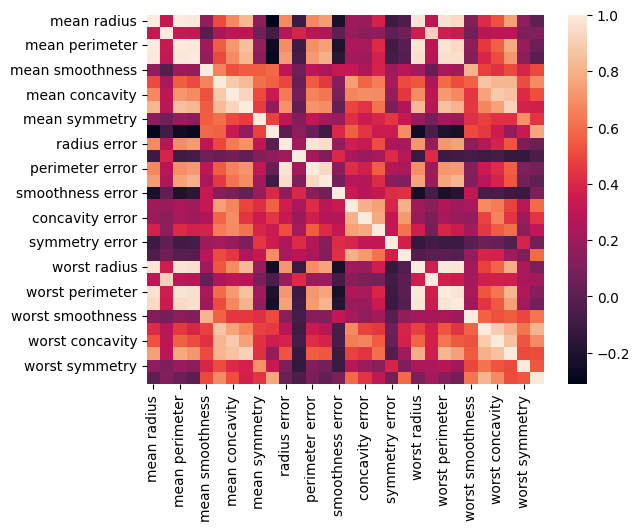

In [5]:
# covariance
c = Z.cov()

# Plot the covariance matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(c)
plt.show()

Now we compute the eigenvectors and eigenvalues for our feature space which serves a great purpose n identifying the principal components for our geature space

In [4]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

Eigen values:
 [1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 1.33044823e-04
 7.48803097e-04 1.58933787e-03 6.90046388e-03 8.17763986e-03
 1.54812714e-02 1.80550070e-02 2.43408378e-02 2.74394025e-02
 3.11594025e-02 2.99728939e-02]
Eigen values Shape: (30,)
Eigen Vector Shape: (30, 30)


Sort the eigenvalues in descending order and sort the corresponding eigenvectors accordingly.

In [7]:
# Index the eigenvalues in descending order 
idx = eigenvalues.argsort()[::-1]

# Sort the eigenvalues in descending order 
eigenvalues = eigenvalues[idx]

# sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]

Explained variiance is the term that gives us an idea of the amount of the total variance which has been retained by selecting the principal components instead of the original feature space.

In [8]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

__Determine the Number of Principal Components__

Here we can either consider the number of principal components of any value of our choice by limiting the explained variance. Here we are considering explained variance more than equal to 50%. Let's check how many pricipal components come into this.

In [9]:
n_components = np.argmax(explained_var >= 0.50) + 1
n_components

2

__Project the Data onto the Selected Principal Components__

* Find the projection matrix. It is a matrix of eigenvectors corresponding to the largest eigenvalues of the covariance matrix of the data. It projects the high-dimensional datasets onto a lower-dimensional subspace
* The eigenvectors of the covariance matrix of the data are referred to as the principal axes of the data, and the projection of the data instances onto these principal axes are called the principal components.

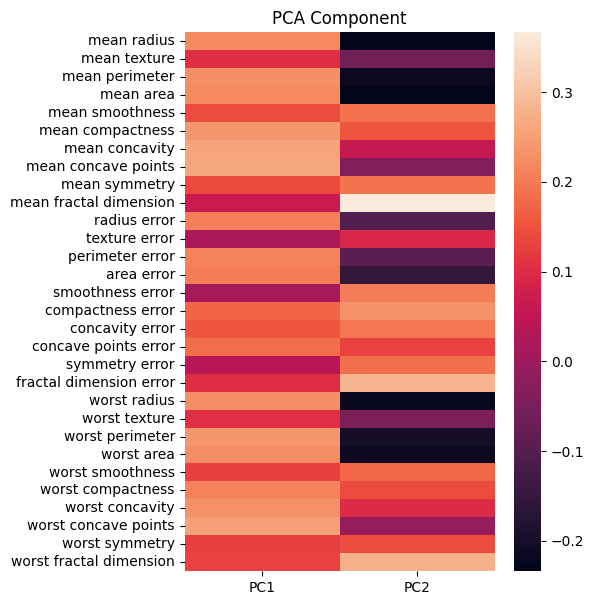

In [10]:
# PCA component or unit matrix
u = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(u,
							index = cancer['feature_names'],
							columns = ['PC1','PC2']
							)

# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()

* Then, we project our dataset using the formula:
  \begin{align}
   Proj_{P_i}(u) = \frac{P_{i} \cdot u}{\lvert u \rvert} = P_{i} \cdot u
  \end{align}

* Dimensionality reduction is then obtained by only retaining those axes (dimensions) that account for most of the variance, and discarding all others.


![](https://media.geeksforgeeks.org/wp-content/uploads/20230420165637/Finding-Projection-in-PCA.webp)

In [11]:
# Matrix multiplication or dot Product
Z_pca = Z @ pca_component
# Rename the columns name
Z_pca.rename({'PC1': 'PCA1', 'PC2': 'PCA2'}, axis=1, inplace=True)
# Print the Pricipal Component values
print(Z_pca)

          PCA1       PCA2
0     9.184755   1.946870
1     2.385703  -3.764859
2     5.728855  -1.074229
3     7.116691  10.266556
4     3.931842  -1.946359
..         ...        ...
564   6.433655  -3.573673
565   3.790048  -3.580897
566   1.255075  -1.900624
567  10.365673   1.670540
568  -5.470430  -0.670047

[569 rows x 2 columns]


### PCA Using Sci-Kit Learn

There are different libraries in which the whole process of the principal component analysis has been automated by implementing it in a package as a function and we just have to pass the number of principl components which we would like to have. SKLearn is one such library that can be used for the PCA as shown below

In [12]:
# Importing PCA
from sklearn.decomposition import PCA

# Let's say, components = 2
pca = PCA(n_components=2)
pca.fit(Z)
x_pca = pca.transform(Z)

# Create the dataframe
df_pca1 = pd.DataFrame(x_pca,
					columns=['PC{}'.
					format(i+1)
						for i in range(n_components)])
print(df_pca1)


           PC1        PC2
0     9.184755   1.946870
1     2.385703  -3.764859
2     5.728855  -1.074229
3     7.116691  10.266556
4     3.931842  -1.946359
..         ...        ...
564   6.433655  -3.573673
565   3.790048  -3.580897
566   1.255075  -1.900624
567  10.365673   1.670540
568  -5.470430  -0.670047

[569 rows x 2 columns]


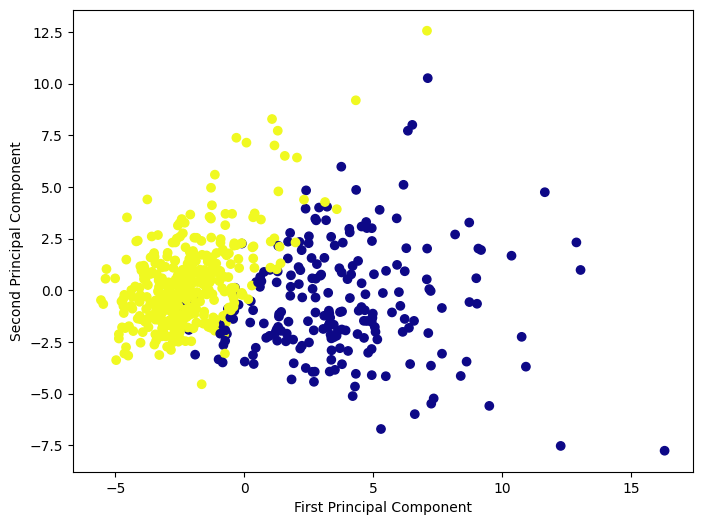

In [13]:
# giving a larger plot
plt.figure(figsize=(8, 6))

plt.scatter(x_pca[:, 0], x_pca[:, 1],
			c=cancer['target'],
			cmap='plasma')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [14]:
# components
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

## Singular Value Decomposition

The Singular Value Decomposition (SVD) of a matrix is a factorisation of that matrix into three matrices. It has some interesting algebraic properties and coonveys important geometrical and theoretical insights about linear transformations.

The SVD is given by the mathematical formula:
\begin{align}
A = U \Sigma V^{T} \\
\end{align}
* $U$ is $m \times m$ matrix of the orthonormal eigenvectors of $ AA^{T}$
* $V^{T}$ is the transpose of the $n \times n$ matrixx containing the orthonormal eigenvectors of $A^{T}A$
* $\Sigma$ is a diagonal matrix with $r$ elements equal to the root of the positive eigenvalues of $AA^{T}$ or $A^{t}A$ (both matrices have the same positive eigenvalues)

In [ ]:
!python -m pip install -U scikit-image

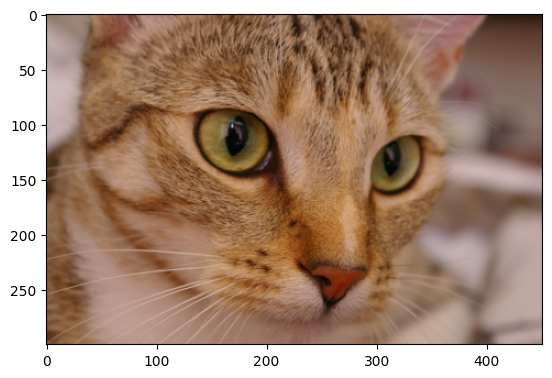

In [34]:
# Imports

from skimage.color import rgb2gray
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import svd

cat = data.chelsea()
plt.imshow(cat)
# convert to grayscale
gray_cat = rgb2gray(cat)

# calculate the SVD and plot the image
U, S, V_T = svd(gray_cat, full_matrices=False)
S = np.diag(S)

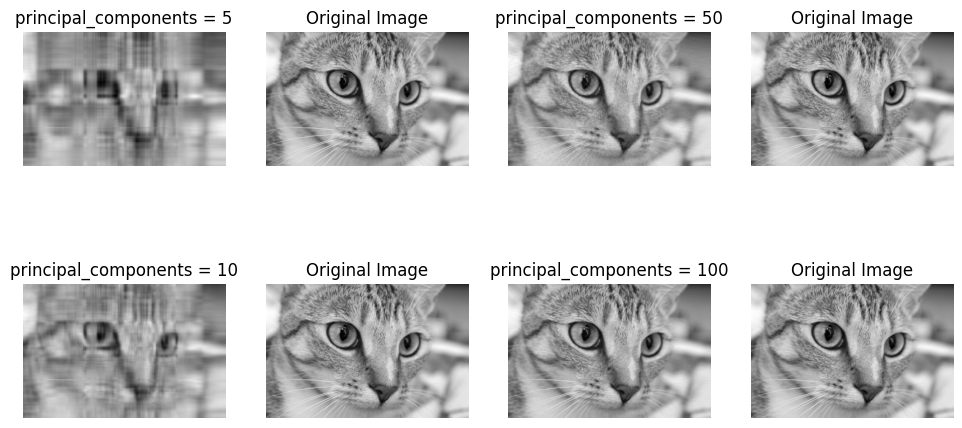

In [76]:
fig, ax = plt.subplots(2, 4, figsize=(12, 6))

curr_row = 0
for r in [5, 10]:
    cat_approx = U[:, :r] @ S[0:r, :r] @ V_T[:r, :]
    ax[curr_row, 0].imshow(cat_approx, cmap='gray')
    ax[curr_row, 0].set_title("principal_components = " + str(r))
    ax[curr_row, 0].axis('off')

    ax[curr_row, 1].set_title("Original Image")
    ax[curr_row, 1].imshow(gray_cat, cmap='gray')
    ax[curr_row, 1].axis('off')

    col_num = 2

    cat_approx = U[:, :r * 10] @ S[0:r * 10, :r * 10] @ V_T[:r * 10, :]
    ax[curr_row, col_num].imshow(cat_approx, cmap='gray')
    ax[curr_row, col_num].set_title("principal_components = " + str(r * 10))
    ax[curr_row, col_num].axis('off')

    ax[curr_row, col_num + 1].set_title("Original Image")
    ax[curr_row, col_num + 1].imshow(gray_cat, cmap='gray')
    ax[curr_row, col_num + 1].axis('off')

    curr_row += 1

plt.show()

## Independant Component Analysis

Independant Component Analysis (ICA) is a statistical and computational technique used in machine learning to separate a multivariate siignal into its independant non-Gaussian components. The goal of ICA is to find a linear transformation of the data such that the transformed data is as close to being statistically independant as possible.

The heart of ICA lies in the principle of statistical independence. ICA identify components within mixed signals that are statistically independent of each other.

* __Original Sources__ are the real individual sources
* __Observed Signals__ is the signal measured on the sensor (with noise)
* __Estimated Sources__ is the calculated signal from the ICA, compare this with original source

In [77]:
import numpy as np
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

# Generate synthetic mixed signals
np.random.seed(42)
samples = 200
time = np.linspace(0, 8, samples)

signal_1 = np.sin(2 * time) 
signal_2 = np.sign(np.sin(3 * time)) 
signal_3 = np.random.laplace(size= samples) 

S = np.c_[signal_1, signal_2, signal_3]
S += 0.2 * np.random.normal(size=S.shape) # Add noise

# Mix the signals
A = np.array([[1, 1, 1], [0.5, 2, 1], [1.5, 1, 2]]) # Mixing matrix
X = S.dot(A.T) # Observed mixed signals

ica = FastICA(n_components=3)
S_ = ica.fit_transform(X) # Estimated sources

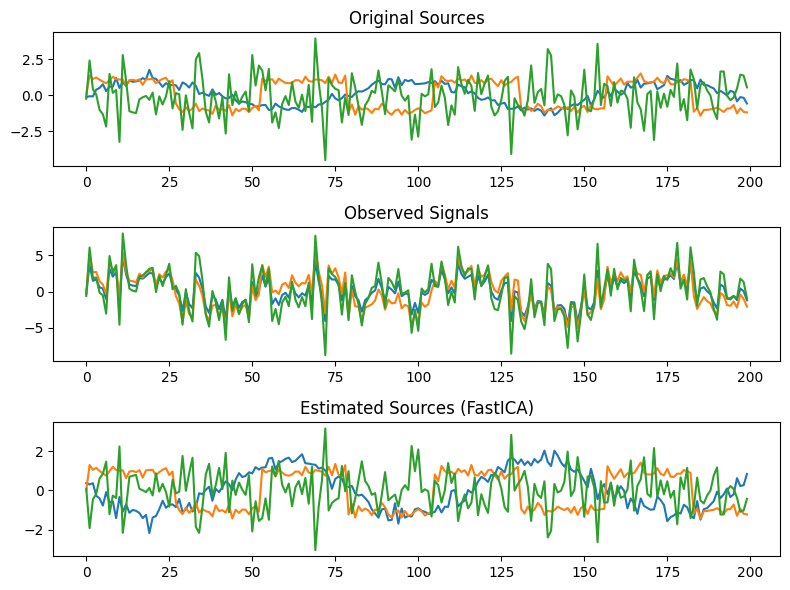

In [78]:
plt.figure(figsize=(8, 6))

plt.subplot(3, 1, 1)
plt.title('Original Sources')
plt.plot(S)

plt.subplot(3, 1, 2)
plt.title('Observed Signals')
plt.plot(X)

plt.subplot(3, 1, 3)
plt.title('Estimated Sources (FastICA)')
plt.plot(S_)

plt.tight_layout()
plt.show()

## Difference between PCA and ICA

| Principal Component Analysis | Independant Component Analysis |
| :------------: | :--------------:|
|It reduces the  dimensions to avoid the problem of overfitting | It decomposes the mixed signal into its independant sources' signals|
| It deals with the Principal Components | It deals with the Independant Components |
|It focuses on maximizing the variance | It does not focus on the issue of variance among the data points. |
| It focuses on the mutual orthogonality property of the principal components. | It doesn't focus on the mutual orthogonality of the components.|
| It doesn't focus on the mutual independance of the components. | It focuses on the mutual  independance of the components. |